In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score, roc_curve, auc, recall_score, make_scorer, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [37]:
data = pd.read_csv('data.csv')

In [39]:
data.head()

,eye_1_x_left,eye_1_x_right,eye_1_y_top,eye_1_y_bottom,eye_2_x_left,eye_2_x_right,eye_2_y_top,eye_2_y_bottom,face_left_width,face_right_width,face_top_width,face_bottom_width,label
0,0.237092,0.306977,0.113314,0.236929,0.327131,0.237460,0.290179,0.043559,0.481037,0.518963,20.779373,32.636758,yes
1,0.236197,0.309617,0.044038,0.292068,0.310075,0.246270,0.157602,0.081729,0.471540,0.528460,33.003154,49.685996,yes
2,0.277218,0.283079,0.134307,0.204437,0.329684,0.228449,0.175093,0.104388,0.462570,0.537430,73.436981,114.498344,yes
3,0.298117,0.256629,0.237652,0.189748,0.328851,0.235823,0.177993,0.138130,0.456527,0.543473,3133.418664,4837.425803,yes
4,0.266254,0.289500,0.182247,0.272353,0.345730,0.227394,0.290249,0.137197,0.464133,0.535867,317.497081,493.683294,yes


In [40]:
data.label.value_counts()

yes    5000
no     5000
Name: label, dtype: int64

In [41]:
data['target'] = data['label'].apply(lambda x: 1.0 if x == 'yes' else 0.0)

In [42]:
data.head()

,eye_1_x_left,eye_1_x_right,eye_1_y_top,eye_1_y_bottom,eye_2_x_left,eye_2_x_right,eye_2_y_top,eye_2_y_bottom,face_left_width,face_right_width,face_top_width,face_bottom_width,label,target
0,0.237092,0.306977,0.113314,0.236929,0.327131,0.237460,0.290179,0.043559,0.481037,0.518963,20.779373,32.636758,yes,1.0
1,0.236197,0.309617,0.044038,0.292068,0.310075,0.246270,0.157602,0.081729,0.471540,0.528460,33.003154,49.685996,yes,1.0
2,0.277218,0.283079,0.134307,0.204437,0.329684,0.228449,0.175093,0.104388,0.462570,0.537430,73.436981,114.498344,yes,1.0
3,0.298117,0.256629,0.237652,0.189748,0.328851,0.235823,0.177993,0.138130,0.456527,0.543473,3133.418664,4837.425803,yes,1.0
4,0.266254,0.289500,0.182247,0.272353,0.345730,0.227394,0.290249,0.137197,0.464133,0.535867,317.497081,493.683294,yes,1.0


In [43]:
X = data.drop(['label', 'target'], axis=1).copy().to_numpy()
y = data['target'].copy().to_numpy()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [45]:
param_grid_rf = {
    "max_depth": [2,3,5,7],
    "max_features": ['sqrt', 10, 50, 100, 150, 200, None],
    "n_estimators": [50, 100, 150]
}

optimal_params_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    verbose=2,
    n_jobs=1,
    cv=5
)

In [46]:
optimal_params_rf.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END ....max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.7s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.7s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.7s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.7s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.7s
[CV] END ...max_depth=2, max_features=sqrt, n_estimators=150; total time=   1.1s
[CV] END ...max_depth=2, max_features=sqrt, n_e

/home/mohotta/anaconda3/envs/gaze-tracker-python/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mohotta/anaconda3/envs/gaze-tracker-python/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mohotta/anaconda3/envs/gaze-tracker-python/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/home/mohotta/anaconda3/envs/gaze-tracker-python/lib/python3.7/sit

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [2, 3, 5, 7],
                         'max_features': ['sqrt', 10, 50, 100, 150, 200, None],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc', verbose=2)

In [47]:
y_pred = optimal_params_rf.predict(X_train)
f1_sc = f1_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
acc_score = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)

print(f"train -> f1-score: {f1_sc} | recall: {recall} | accuracy: {acc_score} | precision: {precision}")

train -> f1-score: 0.9773312094106114 | recall: 0.997 | accuracy: 0.976875 | precision: 0.958423455900024


In [48]:
y_pred = optimal_params_rf.predict(X_test)
f1_sc = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"test -> f1-score: {f1_sc} | recall: {recall} | accuracy: {acc_score} | precision: {precision}")

test -> f1-score: 0.9742828882294757 | recall: 0.985 | accuracy: 0.974 | precision: 0.9637964774951077


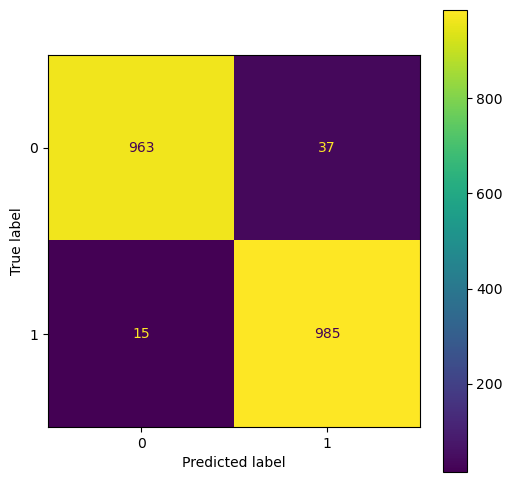

In [49]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot(ax=ax)
plt.show()

In [34]:
import pickle

pickle.dump(optimal_params_rf.best_estimator_, open('model.pkl', 'wb'))

In [35]:
model = optimal_params_rf.best_estimator_

In [ ]:
model.predict(X[0].reshape(1, -1))

array([1.])